# <center>Synchronous Pymarketcap Interface</center>

> See also: [Asynchronous Pymarketcap Scraper](async_live.ipynb)

## Basic usage

#### `Pymarketcap([timeout=20, debug=False, cache=True])`

The first response takes a long time because some data is cached at instantiation of the wrapper.

In [2]:
from pymarketcap import Pymarketcap
cmc = Pymarketcap(timeout=10)

cmc.exchanges()

[{'markets': [{'name': 'Bitcoin',
    'pair': 'BTC/USD',
    'perc_volume': 100.0,
    'price': 10229.5,
    'volume': 2661040000.0,
    'web': 'https://www.bitmex.com/'}],
  'name': 'BitMEX'},
 {'markets': [{'name': 'Bitcoin',
    'pair': 'BTC/USD',
    'perc_volume': 100.0,
    'price': 10229.5,
    'volume': 2661040000.0,
    'web': 'https://www.bitmex.com/'},
   {'name': 'Nano',
    'pair': 'BTC/USDT',
    'perc_volume': 16.85,
    'price': 10239.6,
    'volume': 339572000.0,
    'web': 'https://www.binance.com/trade.html?symbol=BTC_USDT'},
   {'name': 'Nucleus Vision',
    'pair': 'NANO/BTC',
    'perc_volume': 6.65,
    'price': 14.2352,
    'volume': 134108000.0,
    'web': 'https://www.binance.com/trade.html?symbol=NANO_BTC'},
   {'name': 'Litecoin',
    'pair': 'NCASH/BTC',
    'perc_volume': 5.69,
    'price': 0.0394938,
    'volume': 114662000.0,
    'web': 'https://www.binance.com/trade.html?symbol=NCASH_BTC'},
   {'name': 'Ethereum',
    'pair': 'LTC/USDT',
    'perc_volum

> All methods are self explained in docstrings:

In [3]:
print(cmc.exchanges.__doc__)

Get all the exchanges in coinmarketcap ranked by volumes
        along with other metadata.

        Args:
            convert (str, optional): Convert volumes and prices
                between USD and BTC. As default ``"USD"``.

        Returns (list):
            Exchanges with markets and other data included.
        


___________________________________

## Coinmarketcap API
#### `ticker(currency=None, limit=0, start=0, convert="USD")`
If `currency == None`, you will obtain data for all currencies in coinmarketcap:

In [4]:
cmc.ticker()

[{'24h_volume_usd': 7151920000.0,
  'available_supply': 16887850.0,
  'id': 'bitcoin',
  'last_updated': 1519674869,
  'market_cap_usd': 174032671820,
  'max_supply': 21000000.0,
  'name': 'Bitcoin',
  'percent_change_1h': 0.19,
  'percent_change_24h': 7.61,
  'percent_change_7d': -8.02,
  'price_btc': 1.0,
  'price_usd': 10305.2,
  'rank': 1,
  'symbol': 'BTC',
  'total_supply': 16887850.0},
 {'24h_volume_usd': 2012000000.0,
  'available_supply': 97860590.0,
  'id': 'ethereum',
  'last_updated': 1519674852,
  'market_cap_usd': 84849828431.0,
  'max_supply': None,
  'name': 'Ethereum',
  'percent_change_1h': 0.09,
  'percent_change_24h': 3.32,
  'percent_change_7d': -8.53,
  'price_btc': 0.0848544,
  'price_usd': 867.048,
  'rank': 2,
  'symbol': 'ETH',
  'total_supply': 97860590.0},
 {'24h_volume_usd': 464855000.0,
  'available_supply': 39094802192.0,
  'id': 'ripple',
  'last_updated': 1519674841,
  'market_cap_usd': 37370525941.0,
  'max_supply': 100000000000,
  'name': 'Ripple',
  

You can pass a currency through symbol or coin slug:

In [5]:
data_from_symbol = cmc.ticker("BTC")
data_from_slug = cmc.ticker("bitcoin")

data_from_slug

{'24h_volume_usd': 7151920000.0,
 'available_supply': 16887850.0,
 'id': 'bitcoin',
 'last_updated': 1519674869,
 'market_cap_usd': 174032671820,
 'max_supply': 21000000.0,
 'name': 'Bitcoin',
 'percent_change_1h': 0.19,
 'percent_change_24h': 7.61,
 'percent_change_7d': -8.02,
 'price_btc': 1.0,
 'price_usd': 10305.2,
 'rank': 1,
 'symbol': 'BTC',
 'total_supply': 16887850.0}

To get all symbols and slugs you can use the next attributes:

In [6]:
all_symbols = cmc.symbols
all_slugs = cmc.coins

all_symbols

['$$$',
 '1337',
 '1ST',
 '2GIVE',
 '300',
 '42',
 '611',
 '808',
 '888',
 '8BIT',
 'AAC',
 'ABC',
 'ABJ',
 'ABN',
 'ABT',
 'ABY',
 'AC',
 'ACAT',
 'ACC',
 'ACE',
 'ACES',
 'ACN',
 'ACOIN',
 'ACP',
 'ACT',
 'ADA',
 'ADB',
 'ADC',
 'ADCN',
 'ADK',
 'ADST',
 'ADT',
 'ADX',
 'ADZ',
 'AE',
 'AEON',
 'AERM',
 'AGI',
 'AGLC',
 'AGRS',
 'AHT',
 'AI',
 'AIB',
 'AID',
 'AIDOC',
 'AION',
 'AIR',
 'AIT',
 'AIX',
 'AKY',
 'ALIS',
 'ALL',
 'ALQO',
 'ALT',
 'ALTC',
 'ALTCOM',
 'AMB',
 'AMBER',
 'AMM',
 'AMMO',
 'AMP',
 'AMS',
 'ANC',
 'ANI',
 'ANT',
 'ANTI',
 'ANTX',
 'APC',
 'APPC',
 'APX',
 'ARB',
 'ARC',
 'ARCO',
 'ARCT',
 'ARDR',
 'ARG',
 'ARGUS',
 'ARI',
 'ARK',
 'ARN',
 'ART',
 'ARY',
 'ASAFE2',
 'ASN',
 'AST',
 'ATB',
 'ATL',
 'ATM',
 'ATMC',
 'ATMS',
 'ATN',
 'ATOM',
 'ATS',
 'ATX',
 'AU',
 'AUR',
 'AURA',
 'AV',
 'AVH',
 'AVT',
 'AWR',
 'AXIOM',
 'AXP',
 'B2B',
 'B2X',
 'B@',
 'BAC',
 'BAR',
 'BAS',
 'BASH',
 'BAT',
 'BAY',
 'BBP',
 'BBR',
 'BBT',
 'BCA',
 'BCC',
 'BCD',
 'BCDN',
 'BCF',
 '

Other parameters:

In [7]:
print(cmc.ticker.__doc__)

Get currencies with other aditional data.

        Args:
            currency (str, optional): Specify a currency to return data,
                that can be a symbol or coin slug (see ``symbols`` and ``coins``
                properties). In this case the method returns a dict, otherwise
                returns a list. If you dont specify a currency,
                returns data for all in coinmarketcap. As default, ``None``.
            limit (int, optional): Limit amount of coins on response.
                If ``limit == 0``, returns all coins in coinmarketcap.
                Only works if ``currency == None``. As default ``0``.
            start (int, optional): Rank of first currency to retrieve.
                The count starts at 0 for the first currency ranked.
                Only works if ``currency == None``. As default ``0``.
            convert (str, optional): Allows to convert prices, 24h volumes
                and market capitalizations in terms of one of badges
    

If you want to get the valid badges that can be passed to `convert` param programatically, use this:

In [8]:
cmc.ticker_badges

['AUD',
 'BRL',
 'CAD',
 'CHF',
 'CLP',
 'CNY',
 'CZK',
 'DKK',
 'EUR',
 'GBP',
 'HKD',
 'HUF',
 'IDR',
 'ILS',
 'INR',
 'JPY',
 'KRW',
 'MXN',
 'MYR',
 'NOK',
 'NZD',
 'PHP',
 'PKR',
 'PLN',
 'RUB',
 'SEK',
 'SGD',
 'THB',
 'TRY',
 'TWD',
 'USD',
 'ZAR']

#### `stats([convert="USD"])`
Get global criptocurrency statistics. The `convert` parameter works just like in previous method.

In [9]:
cmc.stats()

{'active_assets': 588,
 'active_currencies': 902,
 'active_markets': 8787,
 'bitcoin_percentage_of_market_cap': 38.78,
 'last_updated': 1519674869,
 'total_24h_volume_usd': 18773000578.0,
 'total_market_cap_usd': 448784568679.0}

_____________________________________________

## Web scraper

#### `currency(name, [convert="USD"])`
Get metadata from a currency passed as first argument.

In [10]:
cmc.currency("BTC")

{'announcement': None,
 'chats': [],
 'circulating_supply': 16887850.0,
 'explorers': ['http://blockchain.info',
  'https://live.blockcypher.com/btc/',
  'https://blockchair.com/bitcoin/blocks'],
 'max_supply': 21000000.0,
 'message_boards': ['https://bitcointalk.org', 'https://forum.bitcoin.com/'],
 'mineable': True,
 'price': 10305.2,
 'rank': 1,
 'source_code': 'https://github.com/bitcoin/',
 'total_markets_cap': 174032671820.0,
 'total_markets_volume_24h': 7151920000.0,
 'webs': ['https://bitcoin.org/', 'https://bitcoin.com/']}

#### `markets(name, [convert="USD"])`
Get all markets for a exchange in coinmarketcap. Pass a currency symbol or slug as first parameter. You can convert the response fields `"volume_24h"` and `"price"` between `"USD"` and `"BTC"` with `convert` parameter.

In [11]:
cmc.markets("BTC", convert="BTC")

[{'pair': 'BTC/USDT',
  'percent_volume': 7.04220684795,
  'price': 1.00414,
  'source': 'OKEx',
  'updated': True,
  'volume_24h': 49290.4},
 {'pair': 'BTC/USD',
  'percent_volume': 6.30127294489,
  'price': 1.00146,
  'source': 'Bitfinex',
  'updated': True,
  'volume_24h': 44104.5},
 {'pair': 'BTC/USDT',
  'percent_volume': 4.74254465934,
  'price': 1.00587,
  'source': 'Binance',
  'updated': True,
  'volume_24h': 33194.4},
 {'pair': 'BTC/KRW',
  'percent_volume': 3.73891206837,
  'price': 1.06875,
  'source': 'Upbit',
  'updated': True,
  'volume_24h': 26169.7},
 {'pair': 'BTC/JPY',
  'percent_volume': 3.39624883947,
  'price': 1.00726,
  'source': 'bitFlyer',
  'updated': True,
  'volume_24h': 23771.3},
 {'pair': 'BTC/KRW',
  'percent_volume': 3.2200304254,
  'price': 1.06856,
  'source': 'Bithumb',
  'updated': True,
  'volume_24h': 22537.9},
 {'pair': 'BTC/USD',
  'percent_volume': 2.49401559302,
  'price': 1.00068,
  'source': 'GDAX',
  'updated': True,
  'volume_24h': 17456.3

#### `ranks()`
Get gainers and losers rankings:

In [12]:
cmc.ranks()

{'gainers': {'1h': [{'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'NSR',
    'volume_24h': 76098.4},
   {'name': 'NuShares',
    'percent_change': 73.56,
    'price': 0.00270892,
    'symbol': 'N

#### `historical(currency, [start=datetime(2008, 8, 18), end=datetime.now(), revert=False])`
Get historical prices for a currency. You can filter by `start` and `end` datetimes provided in `datetime` objects. With parameter `revert` active, the response will be ordered in chronological order.

In [13]:
from datetime import datetime

cmc.historical("ETH", start=datetime(2018, 2, 1), revert=True)

{'history': [{'close': 1036.79,
   'date': datetime.datetime(2018, 2, 1, 0, 0),
   'high': 1161.35,
   'low': 984.819,
   'market_cap': 870.709,
   'open': 1119.37,
   'volume': 869.293},
  {'close': 915.785,
   'date': datetime.datetime(2018, 2, 2, 0, 0),
   'high': 1035.77,
   'low': 757.98,
   'market_cap': 923.561,
   'open': 1035.77,
   'volume': 844.279},
  {'close': 964.019,
   'date': datetime.datetime(2018, 2, 3, 0, 0),
   'high': 991.943,
   'low': 847.69,
   'market_cap': 926.429,
   'open': 919.211,
   'volume': 844.279},
  {'close': 834.682,
   'date': datetime.datetime(2018, 2, 4, 0, 0),
   'high': 969.032,
   'low': 805.064,
   'market_cap': 936.976,
   'open': 964.667,
   'volume': 911.111},
  {'close': 697.951,
   'date': datetime.datetime(2018, 2, 5, 0, 0),
   'high': 856.646,
   'low': 644.599,
   'market_cap': 951.948,
   'open': 834.958,
   'volume': 923.728},
  {'close': 793.122,
   'date': datetime.datetime(2018, 2, 6, 0, 0),
   'high': 796.439,
   'low': 574.419

#### `recently([convert="USD"])`
Get recently added coins in coinmarketcap along with other metadata.

In [14]:
list(cmc.recently())

[{'added': 'Today',
  'circulating_supply': None,
  'market_cap': None,
  'name': 'Remme',
  'percent_change': None,
  'price': 0.0292984,
  'symbol': 'REM',
  'volume_24h': 656930.0},
 {'added': 'Today',
  'circulating_supply': None,
  'market_cap': None,
  'name': 'Arcblock',
  'percent_change': None,
  'price': 1.27214,
  'symbol': 'ABT',
  'volume_24h': 76095000.0},
 {'added': 'Today',
  'circulating_supply': None,
  'market_cap': None,
  'name': 'Nucleus Vision',
  'percent_change': None,
  'price': 0.0392334,
  'symbol': 'NCASH',
  'volume_24h': 142868000.0}]

#### `exchange(name [convert="USD"])`
Get data about a exchange:

In [15]:
cmc.exchange("okex")

{'markets': [{'currency': 'Bitcoin',
   'pair': 'BTC/USDT',
   'perc_volume': 28.7467555425,
   'price': 10260.3,
   'updated': True,
   'vol_24h': 503653000.0},
  {'currency': 'Litecoin',
   'pair': 'LTC/USDT',
   'perc_volume': 9.95357259672,
   'price': 217.492,
   'updated': True,
   'vol_24h': 174390000.0},
  {'currency': 'Ethereum',
   'pair': 'ETH/USDT',
   'perc_volume': 9.07236835725,
   'price': 866.634,
   'updated': True,
   'vol_24h': 158951000.0},
  {'currency': 'Ethereum',
   'pair': 'ETH/BTC',
   'perc_volume': 8.60006023616,
   'price': 861.64,
   'updated': True,
   'vol_24h': 150676000.0},
  {'currency': 'Litecoin',
   'pair': 'LTC/BTC',
   'perc_volume': 8.3500080454,
   'price': 217.121,
   'updated': True,
   'vol_24h': 146295000.0},
  {'currency': 'Ethereum Classic',
   'pair': 'ETC/BTC',
   'perc_volume': 7.2539107454,
   'price': 35.6632,
   'updated': True,
   'vol_24h': 127091000.0},
  {'currency': 'Bitcoin Cash',
   'pair': 'BCH/BTC',
   'perc_volume': 4.742

In order to obtain all available values for the `name` parameter, use:

In [16]:
cmc.exchange_slugs

['bitmex',
 'binance',
 'okex',
 'upbit',
 'bitfinex',
 'bithumb',
 'huobi',
 'gdax',
 'kraken',
 'bittrex',
 'hitbtc',
 'bitstamp',
 'bitflyer',
 'bit-z',
 'zaif',
 'fisco',
 'btcbox',
 'poloniex',
 'coinone',
 'quoine',
 'coinegg',
 'exx',
 'btcc',
 'bits-blockchain',
 'wex',
 'coinsbank',
 'bibox',
 'gemini',
 'kucoin',
 'zb-com',
 'bitbank',
 'korbit',
 'gopax',
 'gate-io',
 'exmo',
 'coinbene',
 'livecoin',
 'yobit',
 'simex',
 'aex',
 'itbit',
 'cex-io',
 'liqui',
 'ethfinex',
 'xbtce',
 'tidex',
 'lbank',
 'cryptopia',
 'bitbay',
 'getbtc',
 'coinnest',
 'btctrade-im',
 'bitcoin-indonesia',
 'lakebtc',
 'btc-markets',
 'paribu',
 'exrates',
 'bitinka',
 'rightbtc',
 'c2cx',
 'bx-thailand',
 'qryptos',
 'topbtc',
 'neraexpro',
 'btcturk',
 'fatbtc',
 'idex',
 'bigone',
 'quadrigacx',
 'vebitcoin',
 'luno',
 'allcoin',
 'coinexchange',
 'coinrail',
 'koinex',
 'negocie-coins',
 'coinfloor',
 'coinsquare',
 'coinroom',
 'bitso',
 'btc-alpha',
 'zebpay',
 'coinex',
 'therocktrading'

If you want to get all formatted exchange names:

In [17]:
cmc.exchange_names

['BitMEX',
 'Binance',
 'OKEx',
 'Upbit',
 'Bitfinex',
 'Bithumb',
 'Huobi',
 'GDAX',
 'Kraken',
 'Bittrex',
 'HitBTC',
 'Bitstamp',
 'bitFlyer',
 'Bit-Z',
 'Zaif',
 'Fisco',
 'BTCBOX',
 'Poloniex',
 'Coinone',
 'Quoine',
 'CoinEgg',
 'EXX',
 'BTCC',
 'Bits Blockchain',
 'WEX',
 'CoinsBank',
 'Bibox',
 'Gemini',
 'Kucoin',
 'ZB.COM',
 'Bitbank',
 'Korbit',
 'GOPAX',
 'Gate.io',
 'Exmo',
 'Coinbene',
 'Livecoin',
 'YoBit',
 'Simex',
 'AEX',
 'itBit',
 'CEX.IO',
 'Liqui',
 'Ethfinex',
 'xBTCe',
 'Tidex',
 'Lbank',
 'Cryptopia',
 'BitBay',
 'GetBTC',
 'Coinnest',
 'BtcTrade.im',
 'Bitcoin Indonesia',
 'LakeBTC',
 'BTC Markets',
 'Paribu',
 'Exrates',
 'Bitinka',
 'RightBTC',
 'C2CX',
 'BX Thailand',
 'Qryptos',
 'TOPBTC',
 'Neraex',
 'BTCTurk',
 'Fatbtc',
 'IDEX',
 'BigONE',
 'QuadrigaCX',
 'Vebitcoin',
 'Luno',
 'Allcoin',
 'CoinExchange',
 'Coinrail',
 'Koinex',
 'Negocie Coins',
 'Coinfloor',
 'Coinsquare',
 'Coinroom',
 'Bitso',
 'BTC-Alpha',
 'Zebpay',
 'CoinEx',
 'The Rock Trading',

#### `exchanges([convert="USD"])`
Get all available exchanges in coinmarketcap ranked by volumes with some metadata:

In [18]:
cmc.exchanges()

[{'markets': [{'name': 'Bitcoin',
    'pair': 'BTC/USD',
    'perc_volume': 100.0,
    'price': 10229.5,
    'volume': 2661040000.0,
    'web': 'https://www.bitmex.com/'}],
  'name': 'BitMEX'},
 {'markets': [{'name': 'Bitcoin',
    'pair': 'BTC/USD',
    'perc_volume': 100.0,
    'price': 10229.5,
    'volume': 2661040000.0,
    'web': 'https://www.bitmex.com/'},
   {'name': 'Nano',
    'pair': 'BTC/USDT',
    'perc_volume': 16.85,
    'price': 10239.6,
    'volume': 339572000.0,
    'web': 'https://www.binance.com/trade.html?symbol=BTC_USDT'},
   {'name': 'Nucleus Vision',
    'pair': 'NANO/BTC',
    'perc_volume': 6.65,
    'price': 14.2352,
    'volume': 134108000.0,
    'web': 'https://www.binance.com/trade.html?symbol=NANO_BTC'},
   {'name': 'Litecoin',
    'pair': 'NCASH/BTC',
    'perc_volume': 5.69,
    'price': 0.0394938,
    'volume': 114662000.0,
    'web': 'https://www.binance.com/trade.html?symbol=NCASH_BTC'},
   {'name': 'Ethereum',
    'pair': 'LTC/USDT',
    'perc_volum

#### `tokens([convert="USD"])`
Get platforms tokens data:

In [19]:
cmc.tokens()

[{'circulating_supply': 694415424.122,
  'market_cap': 5725969039.3,
  'name': 'EOS',
  'platform': 'Ethereum',
  'price': 8.24574,
  'symbol': 'EOS',
  'volume_24h': 252711000.0},
 {'circulating_supply': 65748192475.5,
  'market_cap': 2761897470.96,
  'name': 'TRON',
  'platform': 'Ethereum',
  'price': 0.0420072,
  'symbol': 'TRX',
  'volume_24h': 187808000.0},
 {'circulating_supply': 475347275.127,
  'market_cap': 2638747793.69,
  'name': 'VeChain',
  'platform': 'Ethereum',
  'price': 5.5512,
  'symbol': 'VEN',
  'volume_24h': 137493000.0},
 {'circulating_supply': 2217140813.52,
  'market_cap': 2210766533.68,
  'name': 'Tether',
  'platform': 'Omni',
  'price': 0.997125,
  'symbol': 'USDT',
  'volume_24h': 2369730000.0},
 {'circulating_supply': 102042551.763,
  'market_cap': 1824377965.95,
  'name': 'OmiseGO',
  'platform': 'Ethereum',
  'price': 17.8786,
  'symbol': 'OMG',
  'volume_24h': 36198400.0},
 {'circulating_supply': 386442514.0,
  'market_cap': 1571136142.62,
  'name': 'I

_________________________________

## Graphs API
The graphs API is used internally by coinmarketcap for display graphs info. The params `start` and `end` are passed as `datetime` objects.

#### `graphs.currency(name, [start=None, end=None])`

Get graphs data for a currency:

In [20]:
cmc.graphs.currency("BTC")

{'market_cap_by_available_supply': [[datetime.datetime(2013, 4, 28, 20, 47, 21),
   1500517590],
  [datetime.datetime(2013, 4, 29, 20, 45, 1), 1575032004],
  [datetime.datetime(2013, 4, 30, 20, 45, 2), 1501657492],
  [datetime.datetime(2013, 5, 1, 20, 45, 2), 1298951550],
  [datetime.datetime(2013, 5, 2, 21, 20, 1), 1148667722],
  [datetime.datetime(2013, 5, 3, 21, 20, 1), 1011066494],
  [datetime.datetime(2013, 5, 4, 21, 20, 1), 1236351843],
  [datetime.datetime(2013, 5, 5, 21, 25, 1), 1298377788],
  [datetime.datetime(2013, 5, 6, 21, 25, 3), 1315992303],
  [datetime.datetime(2013, 5, 7, 21, 25, 1), 1183766500],
  [datetime.datetime(2013, 5, 8, 21, 25, 1), 1253655040],
  [datetime.datetime(2013, 5, 9, 21, 50, 1), 1258130700],
  [datetime.datetime(2013, 5, 10, 21, 55, 2), 1322989457],
  [datetime.datetime(2013, 5, 11, 22, 25, 1), 1259239352],
  [datetime.datetime(2013, 5, 12, 22, 25, 1), 1278708678],
  [datetime.datetime(2013, 5, 13, 22, 25, 1), 1306721052],
  [datetime.datetime(2013, 

#### `graphs.global_cap([bitcoin=True, start=None, end=None])`
Display data from [total market capitalization charts](https://coinmarketcap.com/charts/), including or excluding bitcoin:

In [21]:
cmc.graphs.global_cap(bitcoin=False)

{'market_cap_by_available_supply': [[datetime.datetime(2013, 4, 28, 20, 47),
   91346900.0],
  [datetime.datetime(2013, 4, 29, 20, 47), 94087500.0],
  [datetime.datetime(2013, 4, 30, 20, 47), 90416200.0],
  [datetime.datetime(2013, 5, 1, 20, 47), 78877300.0],
  [datetime.datetime(2013, 5, 2, 20, 47), 72337900.0],
  [datetime.datetime(2013, 5, 3, 20, 47), 66800000.0],
  [datetime.datetime(2013, 5, 4, 20, 47), 79306600.0],
  [datetime.datetime(2013, 5, 5, 20, 47), 82748700.0],
  [datetime.datetime(2013, 5, 6, 20, 47), 80775900.0],
  [datetime.datetime(2013, 5, 7, 20, 47), 70380300.0],
  [datetime.datetime(2013, 5, 8, 20, 47), 78779600.0],
  [datetime.datetime(2013, 5, 9, 20, 47), 77892400.0],
  [datetime.datetime(2013, 5, 10, 20, 47), 79292400.0],
  [datetime.datetime(2013, 5, 11, 20, 47), 75550100.0],
  [datetime.datetime(2013, 5, 12, 20, 47), 72145100.0],
  [datetime.datetime(2013, 5, 13, 20, 47), 73187500.0],
  [datetime.datetime(2013, 5, 14, 20, 47), 72419800.0],
  [datetime.datetime

#### `graphs.dominance([start=None, end=None])`
Get data from percentage of total market capitalization chart:

In [22]:
from datetime import datetime, timedelta

ten_days_ago = datetime.now() - timedelta(days=10)
cmc.graphs.dominance(start=ten_days_ago)

{'bitcoin': [[datetime.datetime(2018, 2, 17, 19, 47), 36.1629],
  [datetime.datetime(2018, 2, 18, 19, 47), 37.0028],
  [datetime.datetime(2018, 2, 19, 19, 47), 37.4023],
  [datetime.datetime(2018, 2, 20, 19, 47), 39.2103],
  [datetime.datetime(2018, 2, 21, 19, 47), 39.3036],
  [datetime.datetime(2018, 2, 22, 19, 47), 39.4775],
  [datetime.datetime(2018, 2, 23, 19, 47), 38.6329],
  [datetime.datetime(2018, 2, 24, 19, 47), 38.4529],
  [datetime.datetime(2018, 2, 25, 19, 47), 37.9543],
  [datetime.datetime(2018, 2, 26, 19, 47), 38.7165]],
 'bitcoin-cash': [[datetime.datetime(2018, 2, 17, 19, 47), 5.14941],
  [datetime.datetime(2018, 2, 18, 19, 47), 5.24489],
  [datetime.datetime(2018, 2, 19, 19, 47), 5.17383],
  [datetime.datetime(2018, 2, 20, 19, 47), 5.05605],
  [datetime.datetime(2018, 2, 21, 19, 47), 4.8781],
  [datetime.datetime(2018, 2, 22, 19, 47), 4.76584],
  [datetime.datetime(2018, 2, 23, 19, 47), 4.79737],
  [datetime.datetime(2018, 2, 24, 19, 47), 4.71324],
  [datetime.datetim

_________________________________

## Utils
#### `convert(value, currency_in, currency_out)`
This method converts the value passed as first parameter as price of the `currency_in` currency to price of the `currency_out` parameter. Works as [coinmarketcap criptocurrencies calculator](https://coinmarketcap.com/calculator/). For example, if you want to converts $100€$ to dolars, use:

In [24]:
cmc.convert(100, "EUR", "USD")

123.45877156053122

For get all the currencies supported by this method (all currencies; fiat + crypto):

In [25]:
cmc.currencies_to_convert

['$$$',
 '1337',
 '1ST',
 '2GIVE',
 '300',
 '42',
 '611',
 '808',
 '888',
 '8BIT',
 'AAC',
 'ABC',
 'ABJ',
 'ABN',
 'ABY',
 'AC',
 'ACAT',
 'ACC',
 'ACC',
 'ACC',
 'ACE',
 'ACES',
 'ACN',
 'ACOIN',
 'ACP',
 'ACT',
 'ADA',
 'ADB',
 'ADC',
 'ADCN',
 'ADK',
 'ADST',
 'ADT',
 'ADX',
 'ADZ',
 'AE',
 'AEON',
 'AERM',
 'AGI',
 'AGLC',
 'AGRS',
 'AHT',
 'AI',
 'AIB',
 'AID',
 'AIDOC',
 'AION',
 'AIR',
 'AIT',
 'AIX',
 'AKY',
 'ALIS',
 'ALL',
 'ALQO',
 'ALT',
 'ALTC',
 'ALTCOM',
 'AMB',
 'AMBER',
 'AMM',
 'AMMO',
 'AMP',
 'AMS',
 'ANC',
 'ANI',
 'ANT',
 'ANTI',
 'ANTX',
 'APC',
 'APPC',
 'APX',
 'ARB',
 'ARC',
 'ARCO',
 'ARCT',
 'ARDR',
 'ARG',
 'ARGUS',
 'ARI',
 'ARK',
 'ARN',
 'ART',
 'ARY',
 'ASAFE2',
 'ASN',
 'AST',
 'ATB',
 'ATL',
 'ATM',
 'ATMC',
 'ATMS',
 'ATN',
 'ATOM',
 'ATS',
 'ATX',
 'AU',
 'AUD',
 'AUR',
 'AURA',
 'AV',
 'AVH',
 'AVT',
 'AWR',
 'AXIOM',
 'AXP',
 'B2B',
 'B2X',
 'B@',
 'BAC',
 'BAR',
 'BAS',
 'BASH',
 'BAT',
 'BAT',
 'BAY',
 'BBP',
 'BBR',
 'BBT',
 'BCA',
 'BCC',
 'B

#### `download_logo(name, [size=128, filename=None])`
Download a currency image logo in `.png` format. Valid sizes are: `[16, 32, 64, 128, 200]`.

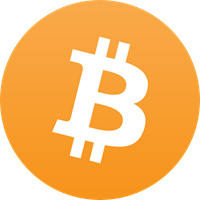

In [26]:
filename = cmc.download_logo("BTC", size=200)

from IPython.display import Image
Image(filename)

In [30]:
import os
try:
    os.remove(filename)
except FileNotFoundError:
    pass